In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline 
import numpy as np

In [2]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

In [3]:
def true_fun(X):
    return np.cos(1.5 * np.pi * X)

In [4]:
np.random.seed(0)

n_samples = 30

X = np.sort(np.random.rand(n_samples))
y = true_fun(X) + np.random.randn(n_samples) * 0.1

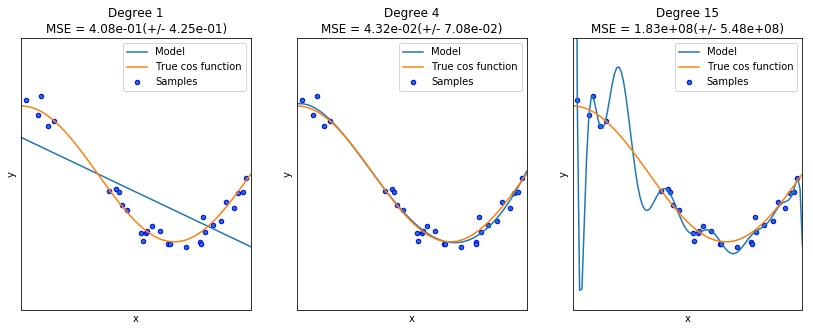

In [5]:
degrees = [1, 4, 15]

plt.figure(figsize=(14, 5))
for i in range(len(degrees)):
    ax = plt.subplot(1, len(degrees), i + 1)
    plt.setp(ax, xticks=(), yticks=())

    polynomial_features = PolynomialFeatures(degree=degrees[i],
                                             include_bias=False)
    linear_regression = LinearRegression()
    pipeline = Pipeline([("polynomial_features", polynomial_features),
                         ("linear_regression", linear_regression)])
    pipeline.fit(X[:, np.newaxis], y)

    scores = cross_val_score(pipeline, X[:, np.newaxis], y,
                             scoring="neg_mean_squared_error", cv=10)

    X_test = np.linspace(0, 1, 100)
    plt.plot(X_test, pipeline.predict(X_test[:, np.newaxis]), label="Model")
    plt.plot(X_test, true_fun(X_test), label="True cos function")
    plt.scatter(X, y, edgecolor='b', s=20, label="Samples")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.xlim((0, 1))
    plt.ylim((-2, 2))
    plt.legend(loc="best")
    plt.title("Degree {}\nMSE = {:.2e}(+/- {:.2e})".format(
        degrees[i], -scores.mean(), scores.std()))
plt.show()

#### Plot how the mean square error changes with the polynomial degree ranging between 1 and 30. Do this for the cosine and some other function of your choosing. See what happens if you increase the measurment noise. 

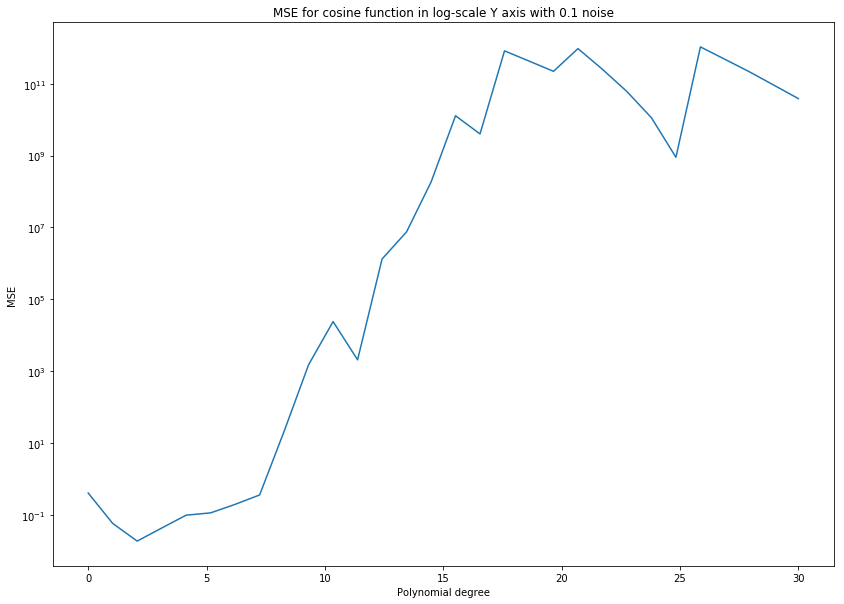

In [6]:
degrees = np.arange(1, 31)
MSE = []
STD = []
for i in range (len(degrees)):
    polynomial_features = PolynomialFeatures(degree=degrees[i],
                                             include_bias=False)
    linear_regression = LinearRegression()
    pipeline = Pipeline([("polynomial_features", polynomial_features),
                         ("linear_regression", linear_regression)])
    pipeline.fit(X[:, np.newaxis], y)
    
    scores = cross_val_score(pipeline, X[:, np.newaxis], y,
                             scoring="neg_mean_squared_error", cv=10)
    X_test = np.linspace(0, 1, 100)
    MSE.append(-scores.mean())
fig, ax = plt.subplots(1,figsize=(14,10))
# plt.figure(figsize=[14, 10])
a = np.linspace(0, 30, 30)
plt.semilogy(a, MSE)
plt.xlabel('Polynomial degree')
plt.ylabel('MSE')
plt.title('MSE for cosine function in log-scale Y axis with 0.1 noise')
plt.show()

#### Sine function example

In [7]:
def true_sin_fun(X):
    return np.sin(3.75 * np.pi * X)

In [8]:
np.random.seed(0)

n_samples = 30

X = np.sort(np.random.rand(n_samples))
y_sin = true_sin_fun(X) + np.random.randn(n_samples) * 0.1

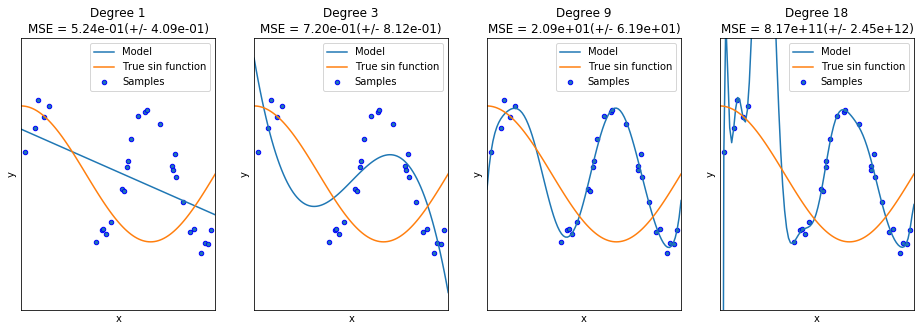

In [9]:
degrees = [1, 3, 9, 18]

plt.figure(figsize=(16, 5))
for i in range(len(degrees)):
    ax = plt.subplot(1, len(degrees), i + 1)
    plt.setp(ax, xticks=(), yticks=())

    polynomial_features = PolynomialFeatures(degree=degrees[i],
                                             include_bias=False)
    linear_regression = LinearRegression()
    pipeline = Pipeline([("polynomial_features", polynomial_features),
                         ("linear_regression", linear_regression)])
    pipeline.fit(X[:, np.newaxis], y_sin)

    scores = cross_val_score(pipeline, X[:, np.newaxis], y_sin,
                             scoring="neg_mean_squared_error", cv=10)

    X_test = np.linspace(0, 1, 100)
    plt.plot(X_test, pipeline.predict(X_test[:, np.newaxis]), label="Model")
    plt.plot(X_test, true_fun(X_test), label="True sin function")
    plt.scatter(X, y_sin, edgecolor='b', s=20, label="Samples")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.xlim((0, 1))
    plt.ylim((-2, 2))
    plt.legend(loc="best")
    plt.title("Degree {}\nMSE = {:.2e}(+/- {:.2e})".format(
        degrees[i], -scores.mean(), scores.std()))
plt.show()

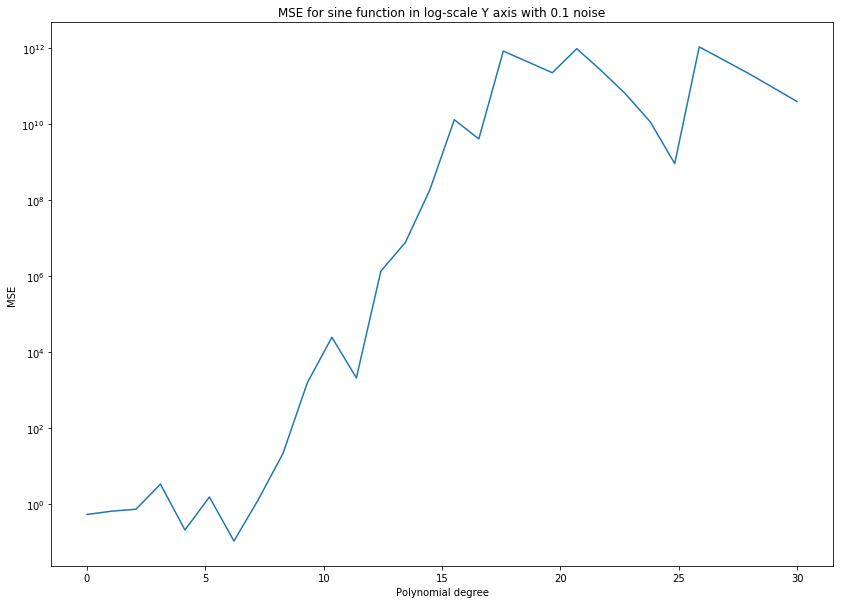

In [10]:
degrees = np.arange(1, 31)
MSE = []
STD = []
for i in range (len(degrees)):
    polynomial_features = PolynomialFeatures(degree=degrees[i],
                                             include_bias=False)
    linear_regression = LinearRegression()
    pipeline = Pipeline([("polynomial_features", polynomial_features),
                         ("linear_regression", linear_regression)])
    pipeline.fit(X[:, np.newaxis], y_sin)
    
    scores = cross_val_score(pipeline, X[:, np.newaxis], y_sin,
                             scoring="neg_mean_squared_error", cv=10)
    X_test = np.linspace(0, 1, 100)
    MSE.append(-scores.mean())
fig, ax = plt.subplots(1,figsize=(14,10))
# plt.figure(figsize=[14, 10])
a = np.linspace(0, 30, 30)
plt.semilogy(a, MSE)
plt.xlabel('Polynomial degree')
plt.ylabel('MSE')
plt.title('MSE for sine function in log-scale Y axis with 0.1 noise')
plt.show()

#### Increasing measure noise for cosine example 

In [11]:
y_cos = true_fun(X) + np.random.randn(n_samples) * 0.25

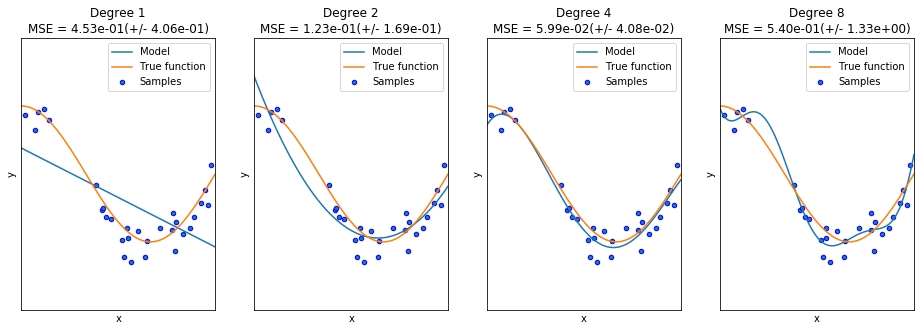

In [12]:
degrees = [1, 2, 4, 8]

plt.figure(figsize=(16, 5))
for i in range(len(degrees)):
    ax = plt.subplot(1, len(degrees), i + 1)
    plt.setp(ax, xticks=(), yticks=())

    polynomial_features = PolynomialFeatures(degree=degrees[i],
                                             include_bias=False)
    linear_regression = LinearRegression()
    pipeline = Pipeline([("polynomial_features", polynomial_features),
                         ("linear_regression", linear_regression)])
    pipeline.fit(X[:, np.newaxis], y_cos)

    scores = cross_val_score(pipeline, X[:, np.newaxis], y_cos,
                             scoring="neg_mean_squared_error", cv=10)

    X_test = np.linspace(0, 1, 100)
    plt.plot(X_test, pipeline.predict(X_test[:, np.newaxis]), label="Model")
    plt.plot(X_test, true_fun(X_test), label="True function")
    plt.scatter(X, y_cos, edgecolor='b', s=20, label="Samples")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.xlim((0, 1))
    plt.ylim((-2, 2))
    plt.legend(loc="best")
    plt.title("Degree {}\nMSE = {:.2e}(+/- {:.2e})".format(
        degrees[i], -scores.mean(), scores.std()))
plt.show()

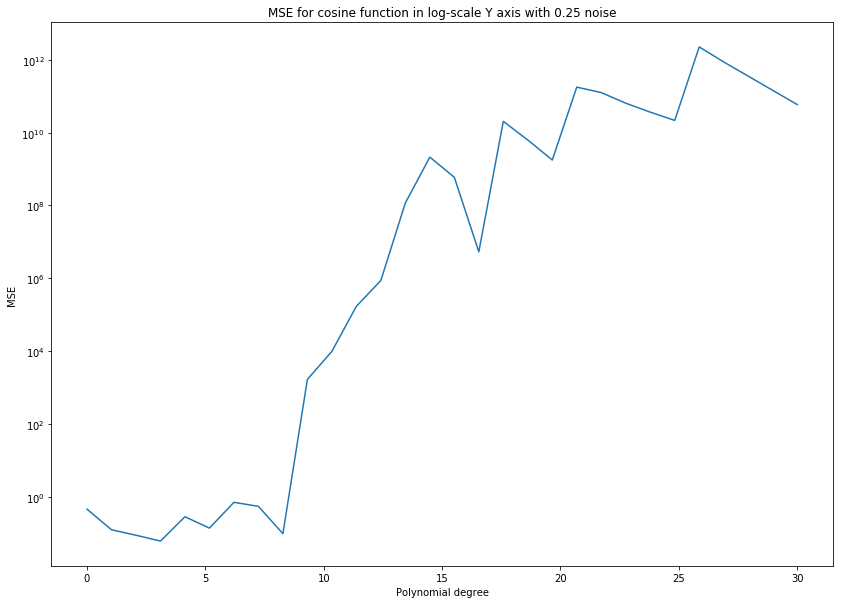

In [13]:
degrees = np.arange(1, 31)
MSE = []
STD = []
for i in range (len(degrees)):
    polynomial_features = PolynomialFeatures(degree=degrees[i],
                                             include_bias=False)
    linear_regression = LinearRegression()
    pipeline = Pipeline([("polynomial_features", polynomial_features),
                         ("linear_regression", linear_regression)])
    pipeline.fit(X[:, np.newaxis], y_cos)
    
    scores = cross_val_score(pipeline, X[:, np.newaxis], y_cos,
                             scoring="neg_mean_squared_error", cv=10)
    X_test = np.linspace(0, 1, 100)
    MSE.append(-scores.mean())
fig, ax = plt.subplots(1,figsize=(14,10))
# plt.figure(figsize=[14, 10])
a = np.linspace(0, 30, 30)
plt.semilogy(a, MSE)
plt.xlabel('Polynomial degree')
plt.ylabel('MSE')
plt.title('MSE for cosine function in log-scale Y axis with 0.25 noise')
plt.show()

In [14]:
y_noise = true_fun(X) + np.random.randn(n_samples) * 0.75

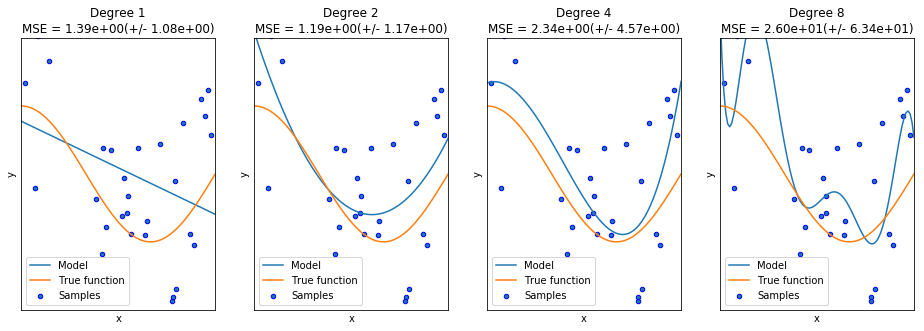

In [15]:
degrees = [1, 2, 4, 8]

plt.figure(figsize=(16, 5))
for i in range(len(degrees)):
    ax = plt.subplot(1, len(degrees), i + 1)
    plt.setp(ax, xticks=(), yticks=())

    polynomial_features = PolynomialFeatures(degree=degrees[i],
                                             include_bias=False)
    linear_regression = LinearRegression()
    pipeline = Pipeline([("polynomial_features", polynomial_features),
                         ("linear_regression", linear_regression)])
    pipeline.fit(X[:, np.newaxis], y_noise)

    scores = cross_val_score(pipeline, X[:, np.newaxis], y_noise,
                             scoring="neg_mean_squared_error", cv=10)

    X_test = np.linspace(0, 1, 100)
    plt.plot(X_test, pipeline.predict(X_test[:, np.newaxis]), label="Model")
    plt.plot(X_test, true_fun(X_test), label="True function")
    plt.scatter(X, y_noise, edgecolor='b', s=20, label="Samples")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.xlim((0, 1))
    plt.ylim((-2, 2))
    plt.legend(loc="best")
    plt.title("Degree {}\nMSE = {:.2e}(+/- {:.2e})".format(
        degrees[i], -scores.mean(), scores.std()))
plt.show()

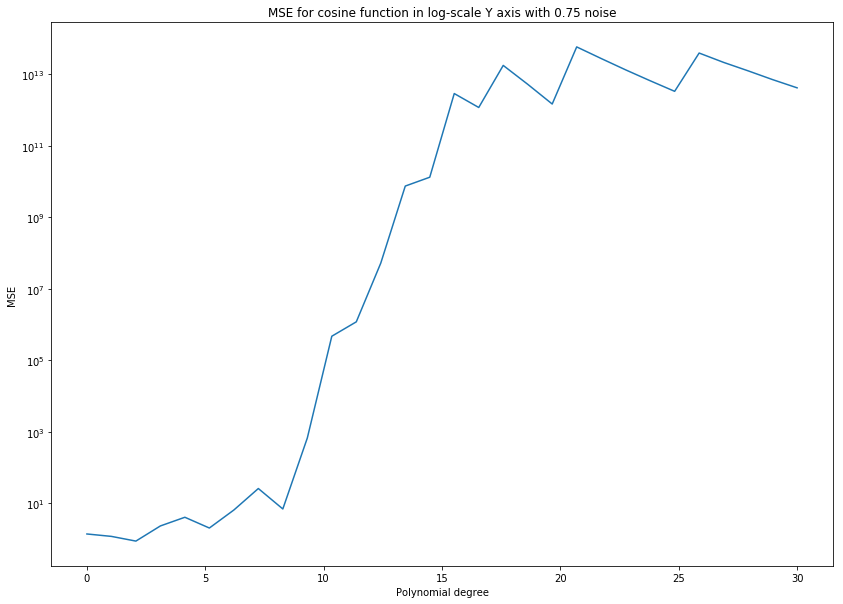

In [16]:
degrees = np.arange(1, 31)
MSE = []
STD = []
for i in range (len(degrees)):
    polynomial_features = PolynomialFeatures(degree=degrees[i],
                                             include_bias=False)
    linear_regression = LinearRegression()
    pipeline = Pipeline([("polynomial_features", polynomial_features),
                         ("linear_regression", linear_regression)])
    pipeline.fit(X[:, np.newaxis], y_noise)
    
    scores = cross_val_score(pipeline, X[:, np.newaxis], y_noise,
                             scoring="neg_mean_squared_error", cv=10)
    X_test = np.linspace(0, 1, 100)
    MSE.append(-scores.mean())
fig, ax = plt.subplots(1,figsize=(14,10))
# plt.figure(figsize=[14, 10])
a = np.linspace(0, 30, 30)
plt.semilogy(a, MSE)
plt.xlabel('Polynomial degree')
plt.ylabel('MSE')
plt.title('MSE for cosine function in log-scale Y axis with 0.75 noise')
plt.show()